<a href="https://colab.research.google.com/github/JuniorTorresMTJ/Projeto_Todo_mundo_odeia_o_COVID/blob/main/notebook/Projeto_Todo_Mundo_Odeia_o_COVID_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
***
#PROJETO TODO MUNDO ODEIA O COVID
***
***

***
#DADOS
***

FONTE: [Kaggle](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19) 

***
#IMPORTAÇÃO DAS BIBLIOTECAS
***

In [ ]:
import pandas            as pd
import numpy             as np
from google.colab import files

#bibliotecas de visualização

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn           as sns

#Bibliotecas de Pré-processamento

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import resample
from sklearn.feature_selection import SelectFromModel

#Bibliotecas de Modelo de Machine Learning

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Bibliotecas de Avaliação do Modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

***
#CARREGAMENTO DA BASE
***

<img src="https://media3.giphy.com/media/3o7TKzNbYBSOVpVpHa/giphy.gif" alt="win" width="300"/>

In [ ]:
df = pd.read_csv("https://github.com/JuniorTorresMTJ/Projeto_Todo_mundo_odeia_o_COVID/blob/main/data/dados_limpos.csv?raw=true")
df.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.994912,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.978029,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
2,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,-0.972789,...,-0.978029,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,-0.935113,...,-1.000000,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-1.000000,-0.88366

In [ ]:
def age_per_int(dados):

  dados_age_percentil = pd.get_dummies(dados[["AGE_PERCENTIL"]]) 

  dados_age = pd.concat([dados_age_percentil, dados], axis=1)

  dados.AGE_PERCENTIL = dados.AGE_PERCENTIL.astype("category").cat.codes

  return dados

In [ ]:
df = age_per_int(df)

In [ ]:
x = df.drop(['ICU'], axis=1)
y = df['ICU']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=2469)

##Modelo Dummy Classifier

In [ ]:
model_dummy = DummyClassifier(strategy='most_frequent')
model_dummy.fit(x_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [ ]:
dummy_pred = model_dummy.predict(x_test)

In [ ]:
model_dummy.score(x_test, y_test)*100

53.77358490566038

<img src="https://media.giphy.com/media/3o7TKFtloXXPVspOWk/giphy.gif" alt="win" width="300"/>

In [ ]:
print('Classification metrics--> \n', classification_report(y_test,dummy_pred))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.54      1.00      0.70        57
           1       0.00      0.00      0.00        49

    accuracy                           0.54       106
   macro avg       0.27      0.50      0.35       106
weighted avg       0.29      0.54      0.38       106



##Modelo de Regressão Logística

In [ ]:
model_log = LogisticRegression(max_iter=1000, random_state=SEED)
model_log.fit(x_train, y_train)
log_pred = model_log.predict(x_test)
model_log.score(x_test, y_test)*100
print('Classification metrics--> \n', classification_report(y_test,log_pred))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.73      0.82      0.78        57
           1       0.76      0.65      0.70        49

    accuracy                           0.75       106
   macro avg       0.75      0.74      0.74       106
weighted avg       0.75      0.75      0.74       106



<img src="https://media.giphy.com/media/dJ5YWZ0YV8llQurXBV/giphy.gif" alt="win" width="300"/>

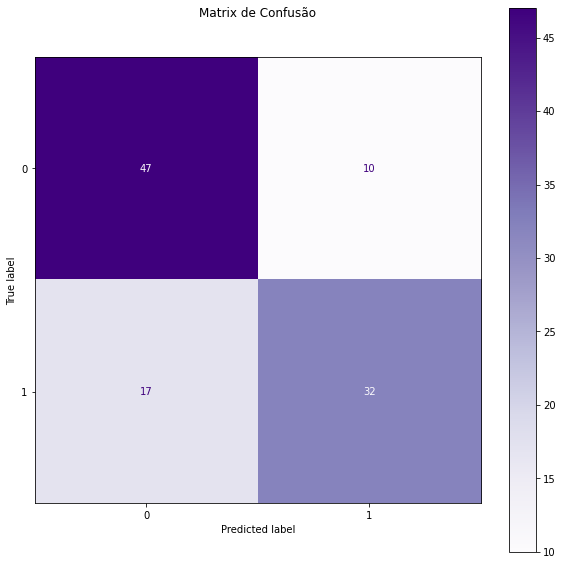

In [ ]:
plt.rcParams.update({'figure.figsize': (10.0, 10.0)})
plot_confusion_matrix(model_log, x_test, y_test, cmap='Purples')
plt.title('Matrix de Confusão', pad = 40)
plt.show()

In [ ]:
SEED = 2469

#Modelo Random Forest Classifier

In [ ]:
model_verde = RandomForestClassifier(n_estimators=1500, random_state=SEED, max_depth=500)
model_verde.fit(x_train, y_train)
verde_pred = model_verde.predict(x_test)
model_verde.score(x_test, y_test)*100
print('Classification metrics--> \n', classification_report(y_test,verde_pred))

Classification metrics--> 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        57
           1       0.79      0.76      0.77        49

    accuracy                           0.79       106
   macro avg       0.79      0.79      0.79       106
weighted avg       0.79      0.79      0.79       106





---



<img src="https://media.giphy.com/media/THa215ZDQKHsXLdEG1/giphy-downsized-large.gif" alt="win" width="300"/>

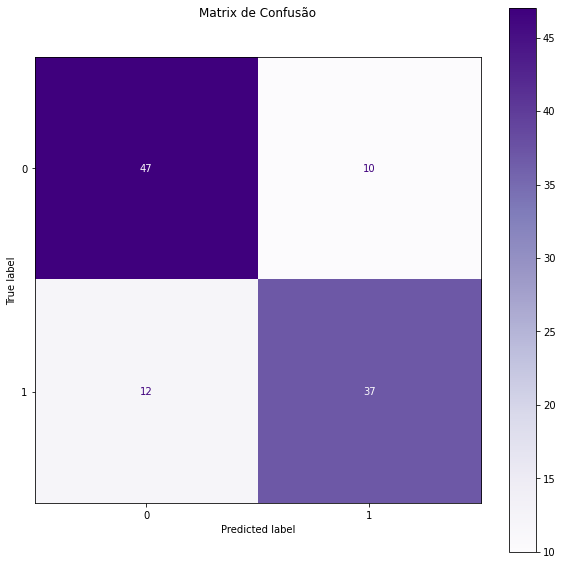

In [ ]:
plt.rcParams.update({'figure.figsize': (10.0, 10.0)})
plot_confusion_matrix(model_verde, x_test, y_test, cmap='Purples')
plt.title('Matrix de Confusão', pad = 40)
plt.show()

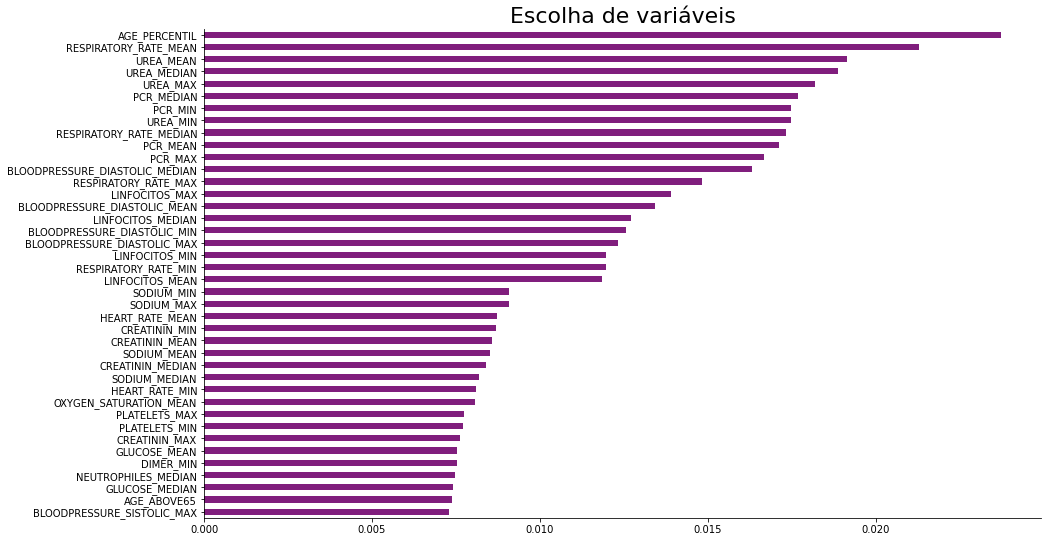

In [ ]:
feat = pd.Series(model_verde.feature_importances_, index = x_train.columns)
ax = feat.nlargest(40).sort_values(ascending = True).plot(kind = 'barh',
                                                                      figsize = (15, 9), color='#801e7d')
plt.title('Escolha de variáveis', fontsize = 22)
sns.despine()
plt.show()

<img src="https://media.giphy.com/media/B3KxtTP5aLc08/giphy.gif" alt="win" width="300"/>

***
#CONCLUSÃO
***

Mas não acaba por aqui! Ainda tem muitas coisas para fazer nesse projeto, como:



*   Balancear as colunas;
*   Testar novos modelos;
*   Tratar mais os dados;
*   Normalizar os dados;
*   Padronizar os dados;
*   Prever outras variáveis;

Obrigado por ter chegado até aqui!

<img src="https://media.giphy.com/media/l0MYA7M8MQ1hMd9tu/giphy.gif" alt="win" width="300"/>